<figure style="text-align:center;">
    <img src='https://stanford.edu/~shervine/teaching/cs-230/illustrations/architecture-cnn-en.jpeg?3b7fccd728e29dc619e1bd8022bf71cf' alt='conv_archi'/>
    <figcaption>Convolution architeture</figcaption>
</figure>

<figure style="text-align:center;">
    <img src='https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png?1c517e00cb8d709baf32fc3d39ebae67' alt='conv_steps'/>
    <figcaption>Convolution steps</figcaption>
</figure>

<figure style="text-align:center;">
    <img src='https://external-content.duckduckgo.com/iu/?u=http%3A%2F%2Fmedia5.datahacker.rs%2F2018%2F11%2Fsl_1.png&f=1&nofb=1&ipt=c3b8023c63b32c2415aa5c012aa6844ace80ceb2227491138f876a98a2970c12&ipo=images' alt='same_padding'/>
    <figcaption>Padding "same"</figcaption>
</figure>

<figure style="text-align:center;">
    <img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fharishnarayanan.org%2Fimages%2Fwriting%2Fartistic-style-transfer%2Fconv-layer.gif&f=1&nofb=1&ipt=28e17960f28895ddc6fbed415086fde4e45e446f35cc4c9a3941d9ba801bc9ea&ipo=images' alt='kernles_2'/>
    <figcaption>Kernels</figcaption>
</figure>

<figure style="text-align:center;">
    <img src='https://stanford.edu/~shervine/teaching/cs-230/illustrations/dimensions-filter-en.png?7ce161e129a392a1804a231536b59f45' alt='kernels'/>
    <figcaption>Kernels</figcaption>
</figure>

<figure style="text-align:center;">
    <img src='https://stanford.edu/~shervine/teaching/cs-230/illustrations/stride.png?36b5b2e02f7e02c3c4075a9d836c048c' alt='stride'/>
    <figcaption>Stride</figcaption>
</figure>

<figure style="text-align:center;">
    <img src='https://stanford.edu/~shervine/teaching/cs-230/illustrations/padding-valid-a.png?1f58d78612f6202ce201620919d71609' alt='padding'/>
    <figcaption>Padding</figcaption>
</figure>

<figure style="text-align:center;">
    <img src='https://stanford.edu/~shervine/teaching/cs-230/illustrations/max-pooling-a.png?711b14799d07f9306864695e2713ae07' alt='pooling'/>
    <figcaption>Max pooling</figcaption>
</figure>

<figure style="text-align:center;">
    <img src='https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Ftse2.mm.bing.net%2Fth%3Fid%3DOIP.XTqD1NfrY9HPj9rLEtXm2AHaFP%26pid%3DApi&f=1&ipt=54b81cc15356134beac1e7fced18485fd4c79c7b6a69be8c5ca3e55265d9ec81&ipo=images' alt='pooling'/>
    <figcaption>Max pooling</figcaption>
</figure>

Conv visualizer: [here](https://ezyang.github.io/convolution-visualizer/index.html) </br>
Conv explainer: [here](https://poloclub.github.io/cnn-explainer/)<br>
Conv nets:  [here](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks)<br>
conv net [here](https://deepai.org/machine-learning-glossary-and-terms/convolutional-neural-network)<br>
pooling [here](https://deeplizard.com/resource/pavq7noze3)<br>
pooling [here](https://deepai.org/machine-learning-glossary-and-terms/max-pooling)<br>
pooling [here](https://www.baeldung.com/cs/neural-networks-pooling-layers)<br>
pooling [here](https://iq.opengenus.org/pooling-layers/)<br>

In [38]:
import numpy as np

# Hozz létre egy bemeneti "képet" (numpy array-t)  (5x5)
# Az értékei legyenek 0 vagy 1
# dtype legyen np.float32
image = np.random.randint(0, 2, (5, 5))

# Hozz létre egy kernelt (numpy array-t)(3x3)
# Az értékei legyenek 0 vagy 1
# dtype legyen np.float32
kernel = np.random.randint(0, 2, (3, 3))

# Mentsd el két külön változóba a létrehozott "kép" (5x5)
# dimenzióinak méretét (height,width)
xImgShape = image.shape[0]
yImgShape = image.shape[1]

# Mentsd el két külön változóba a létrehozott kernel (3x3)
# dimenzióinak méretét (height,width)
xKernShape = kernel.shape[0]
yKernShape = kernel.shape[1]

# Számold ki a kimeneti "kép" dimenzióinak a méretét
# Padding = 0, Stride = 1
# A magasságot és szélességet két külön változóba mentsd el
# NOTE: használt az előbb kiszámold "kép" és kernel szélességet és magasságot
padding = 0
strides = 1
xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)


# Hozz létre egy az előbb kiszámolt kimeneti "kép"
# dimenziójával megegyező 0-kal feltöltött numpy array-t
output = np.zeros((xOutput, yOutput))

# Hajts végire konvolúciót a bemeneti "képen"
# az eredményt az előbb létrehozott kimeneti "képbe" mentsd el
# NOTE: a kimeneti "kép" 1 db pixel értéke a bemeneti kép n darab értékének összegéből jön létre (n = amennyi nem 0 érték van a kernelben)
if padding != 0:
        imagePadded = np.zeros((xImgShape + padding*2, yImgShape + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
        print(imagePadded)
else:
    imagePadded = image

    for y in range(yImgShape):
        if y > yImgShape - yKernShape:
            break
        if y % strides == 0:
            for x in range(xImgShape):
                if x > xImgShape - xKernShape:
                    break
                try:
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

# printeld ki a bemeneti "képet", kernelt és a végeredményül kapott "képet"
print(kernel)
print('------------')
print(image)
print('------------')
print(output)
# Ellenőrizd le, hogy tényleg jó működik a kódod (nem kell semmit írni, csak a printelt értékeket ellenőrizd le)

[[1 1 1]
 [1 1 0]
 [0 1 1]]
------------
[[0 1 0 0 0]
 [0 1 0 1 0]
 [1 0 1 1 0]
 [1 0 0 0 1]
 [0 0 0 0 1]]
------------
[[3. 4. 2.]
 [2. 3. 4.]
 [3. 2. 3.]]


In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 

(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
train_images, test_images = train_images, test_images 

11501568/11490434 [==============================] - 0s 0us/step


In [44]:
class ConvolutionLayer:
    def __init__(self, kernel_num, kernel_size):
        self.kernel_num = kernel_num
        self.kernel_size = kernel_size        
        self.kernels = np.random.randn(kernel_num, kernel_size, kernel_size) / (kernel_size**2)

    def patches_generator(self, image):
        image_h, image_w = image.shape
        patches = []
        for h in range(image_h-self.kernel_size+1):
            for w in range(image_w-self.kernel_size+1):
                patch =  image[h:h+self.kernel_size, w:w+self.kernel_size]
                patches.append((patch, h, w))
        return patches
    
    def forward(self, image):
        image_h, image_w = image.shape
        convolution_output = np.zeros((image_h-self.kernel_size+1, image_w-self.kernel_size+1, self.kernel_num))
        for patch, h, w in self.patches_generator(image):
            for i in range(self.kernel_num):
                convolution_output[h,w,i] = np.sum(patch * self.kernels[i])
        return convolution_output,self.kernels

In [45]:
def plot_convolution_output(convolution_output, kernels, title=None):
    nrows, ncols = 2, (convolution_output.shape[-1] + 1) // 2

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols*2, figsize=(15, 6))

    for i in range(nrows):
        for j in range(ncols):
            idx = i * ncols + j
            if idx < convolution_output.shape[-1]:
                # Plot the kernel
                axes[i, j * 2].imshow(kernels[idx], cmap='viridis')
                axes[i, j * 2].set_xticks([])
                axes[i, j * 2].set_yticks([])
                axes[i, j * 2].set_title(f'Kernel {idx + 1}')

                # Plot the corresponding convolution output
                axes[i, j * 2 + 1].imshow(convolution_output[:, :, idx], cmap='viridis')
                axes[i, j * 2 + 1].set_xticks([])
                axes[i, j * 2 + 1].set_yticks([])
                axes[i, j * 2 + 1].set_title(f'Conv Output {idx + 1}')
            else:
                axes[i, j * 2].axis('off')
                axes[i, j * 2 + 1].axis('off')

    if title:
        fig.suptitle(title)

    plt.show()

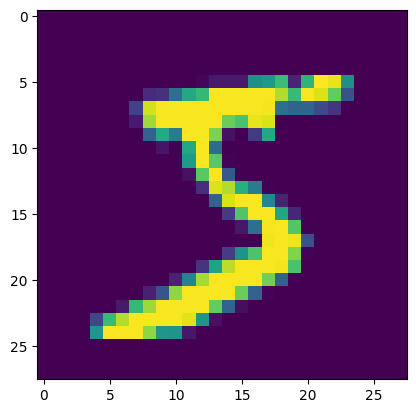

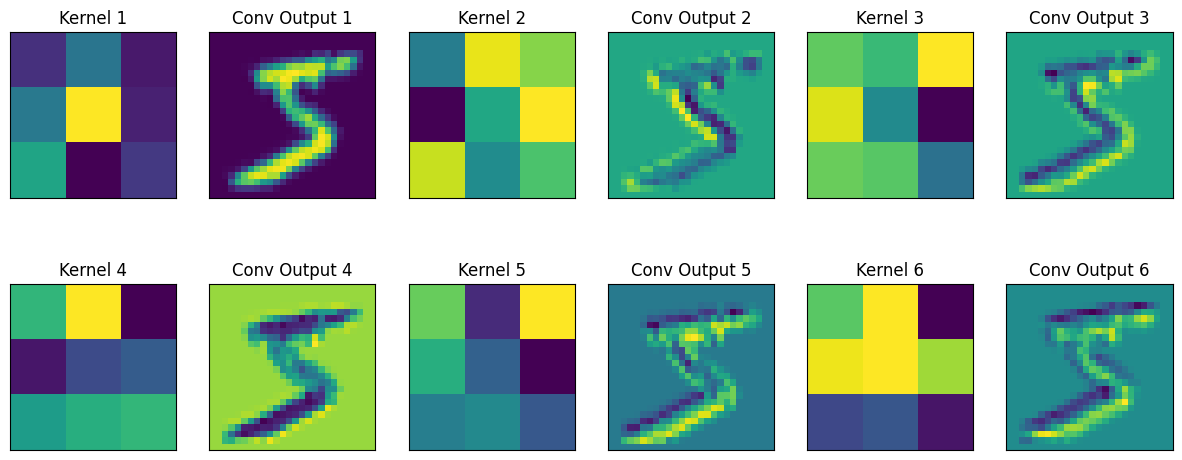

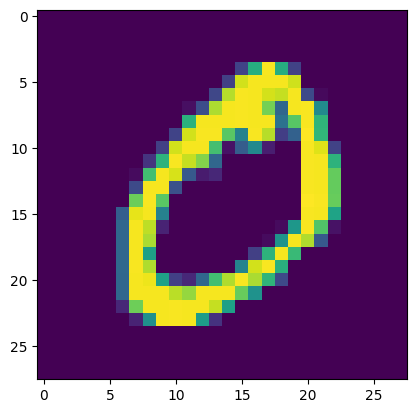

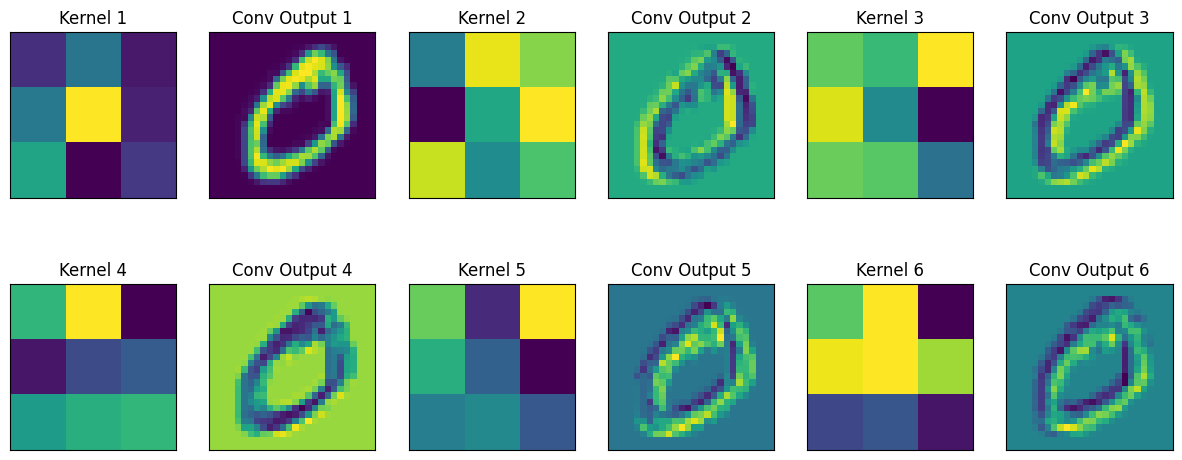

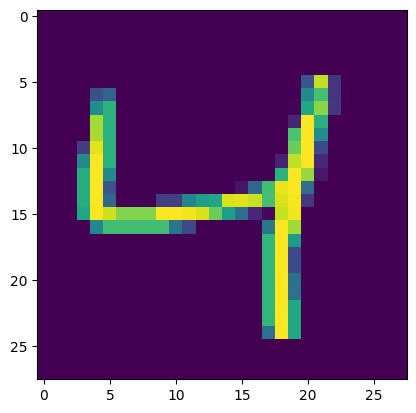

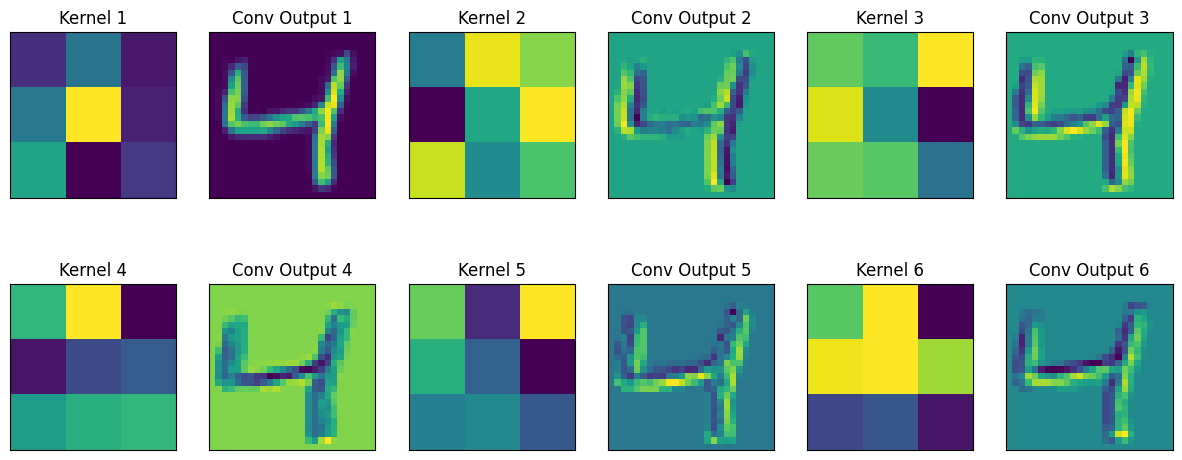

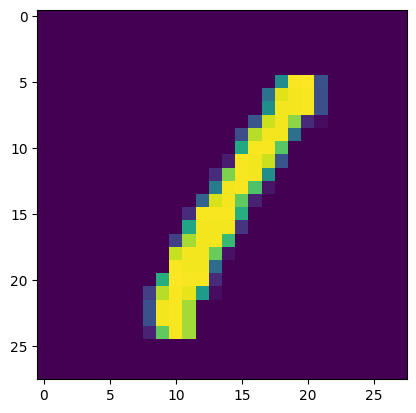

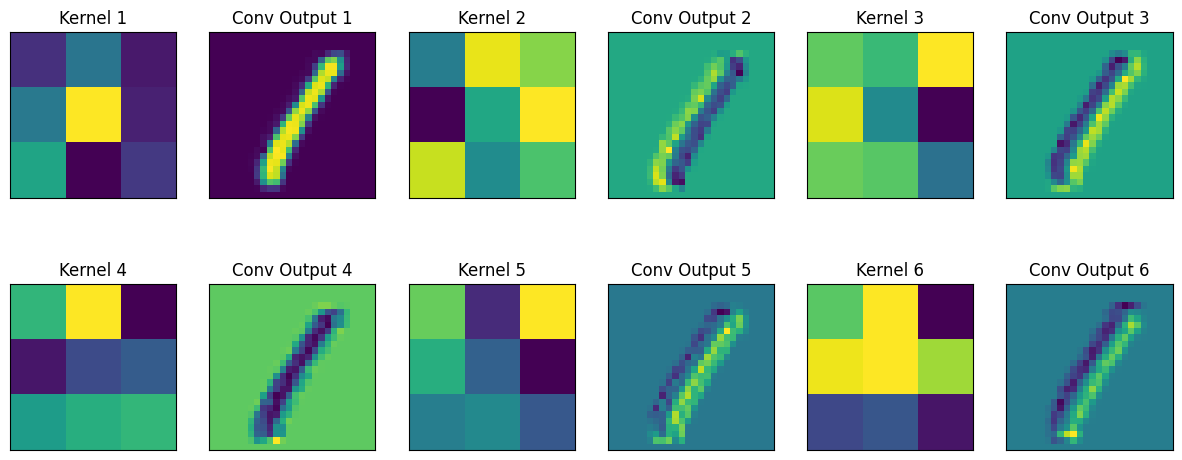

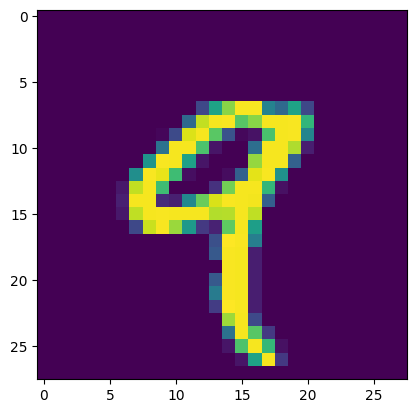

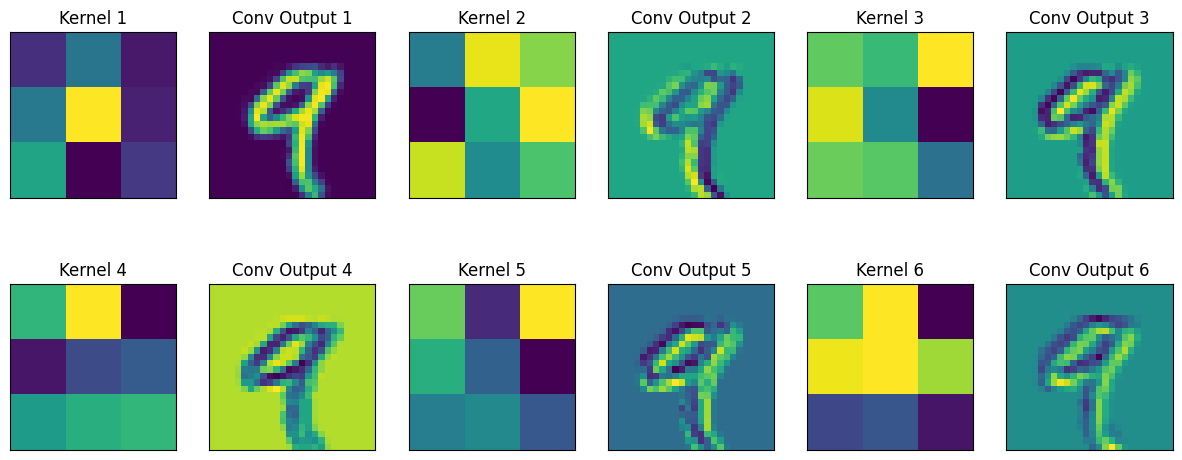

In [46]:
n = 5
kernel_num = 6
kernel_size = 3

conv = ConvolutionLayer(kernel_num=kernel_num,kernel_size=kernel_size)

for index in range(n):
    plt.imshow(train_images[index])
    features,kernels = conv.forward(train_images[index])
    plot_convolution_output(features,kernels)